In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [3]:
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [4]:
y=(data['color']=='red').astype(int)
fields=list(data.columns[:-1])
correlations=data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [5]:
sns.set_context('talk')
sns.set_style('white')

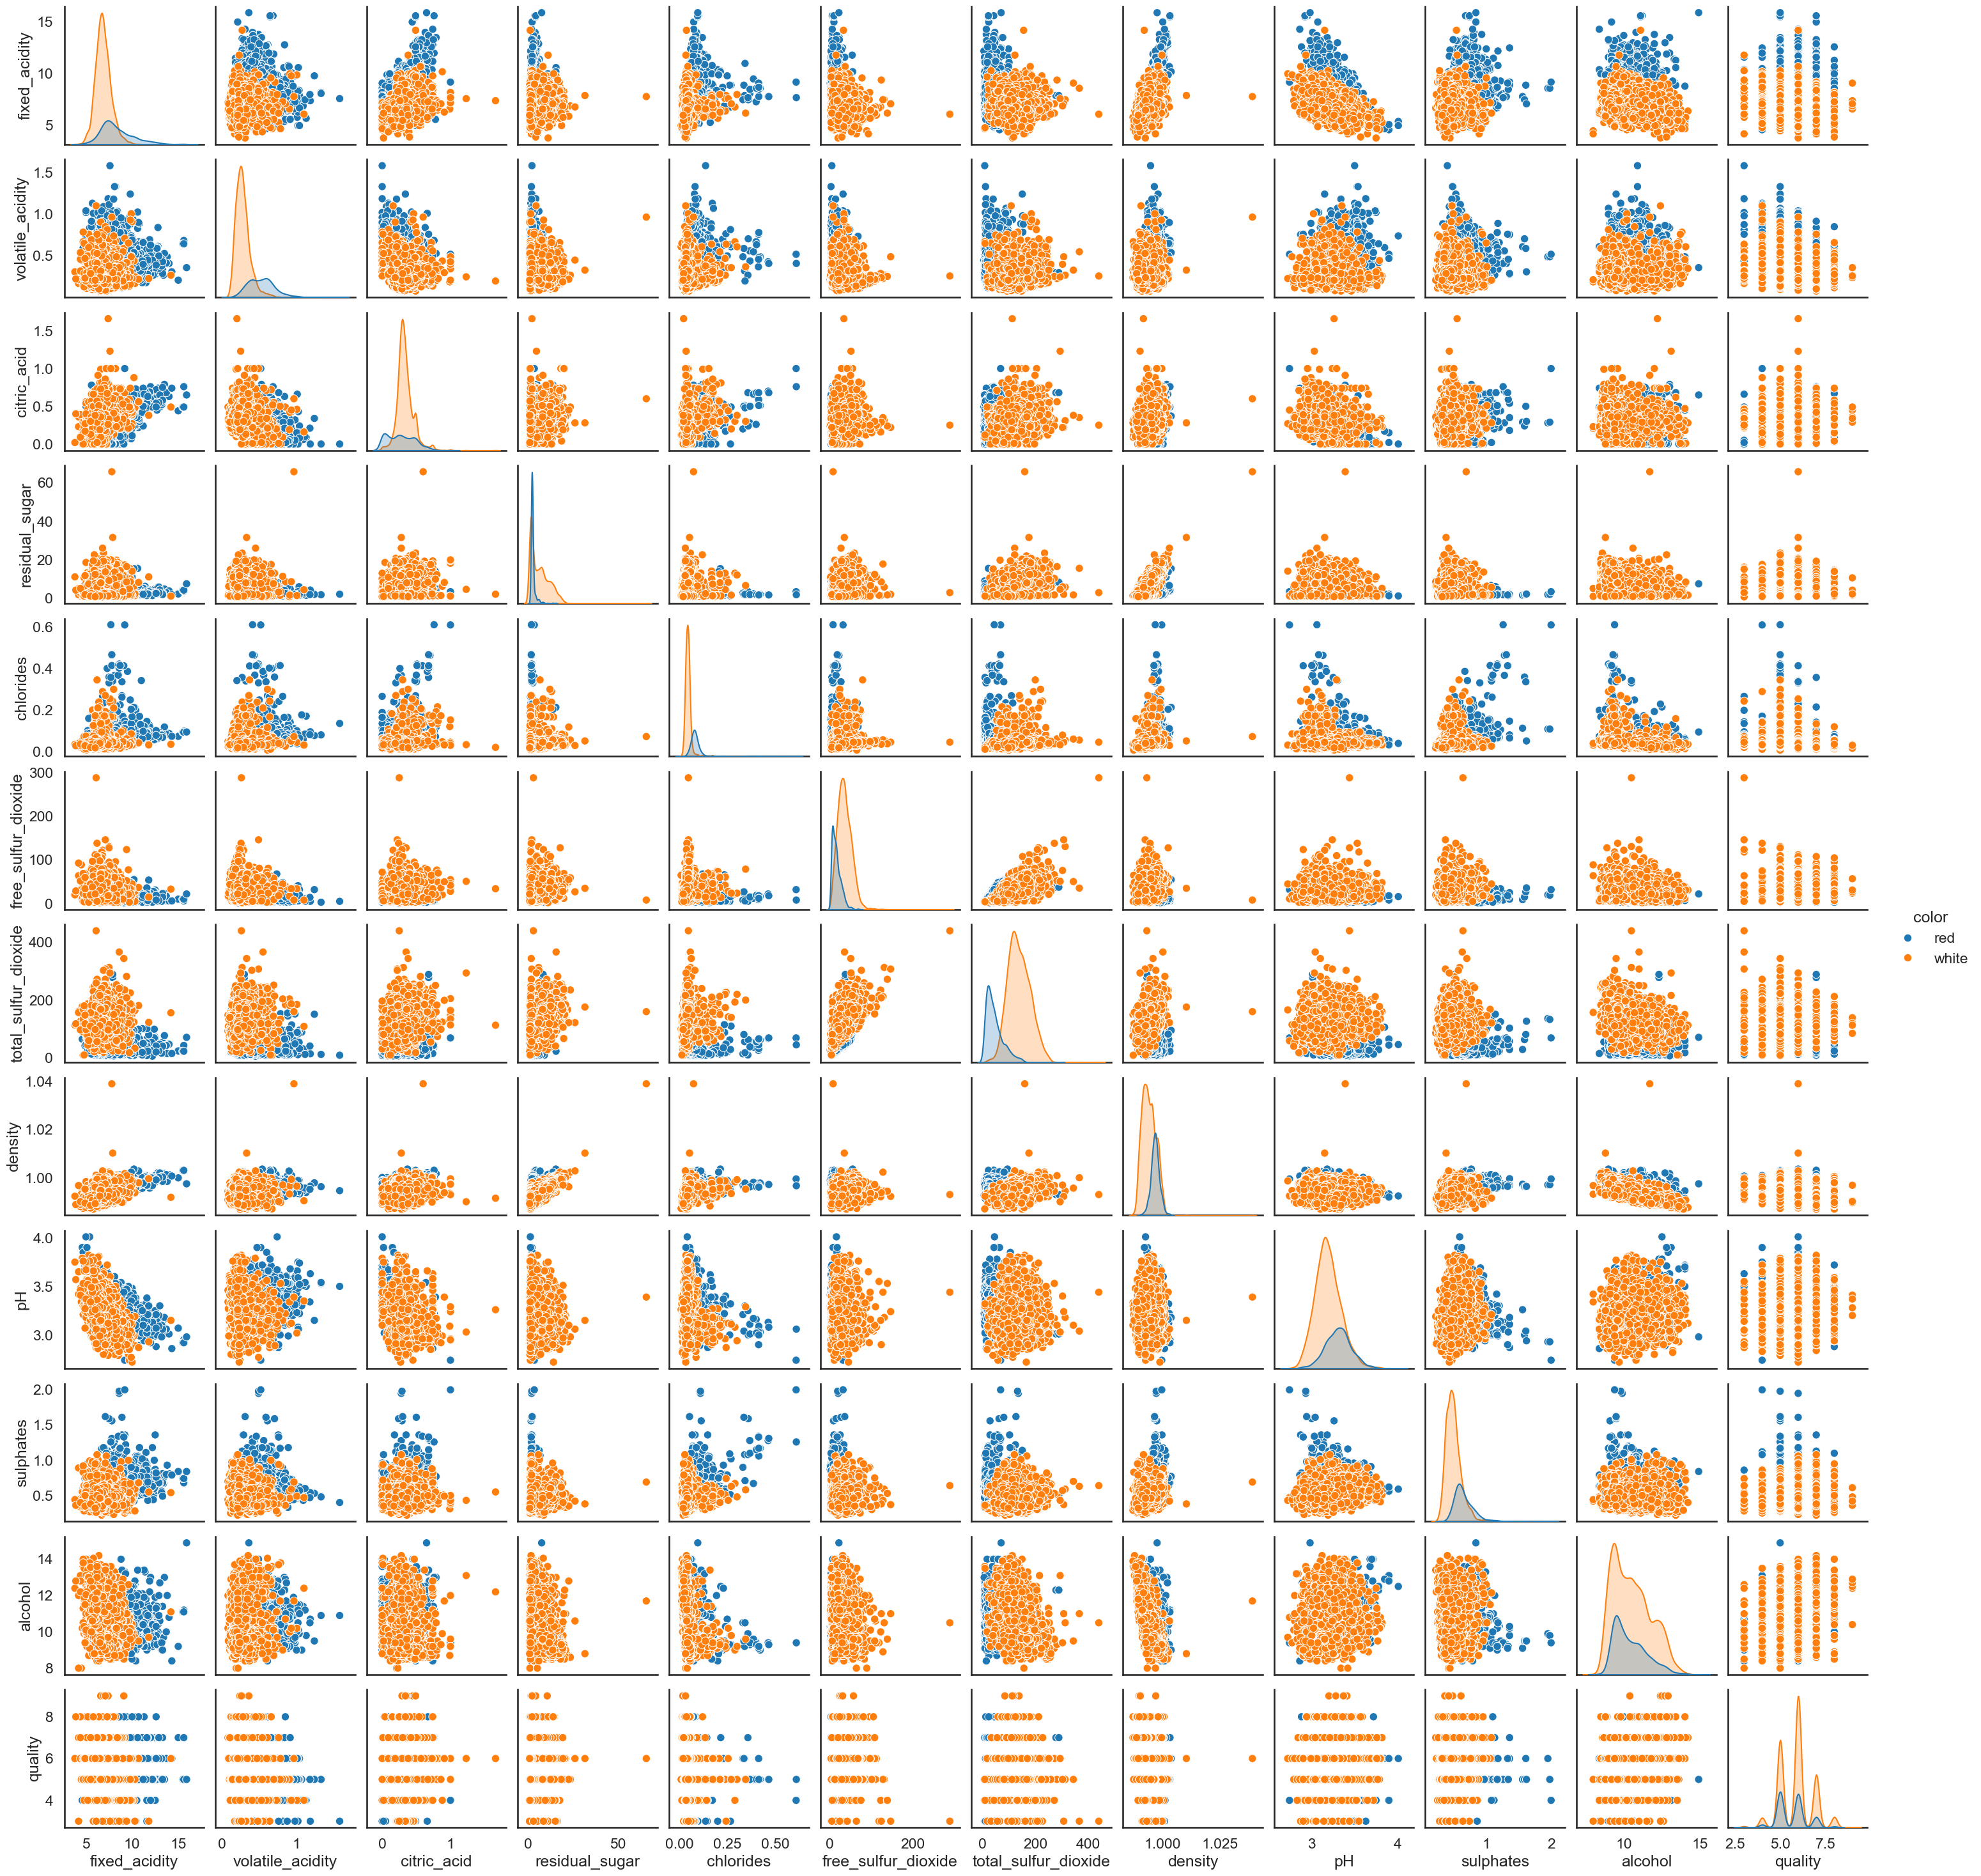

In [6]:
sns.pairplot(data,hue='color')

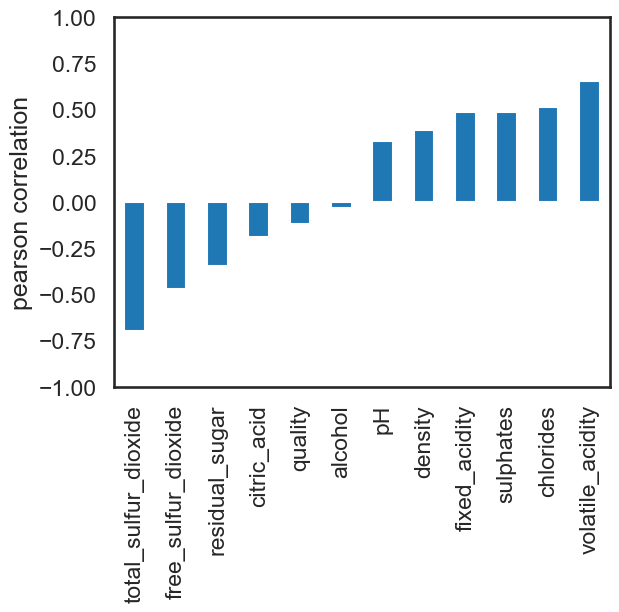

In [8]:
ax=correlations.plot(kind='bar')
ax.set(ylim=[-1,1],ylabel='pearson correlation');

In [11]:
from sklearn.preprocessing import MinMaxScaler

fields=correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X=data[fields]
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


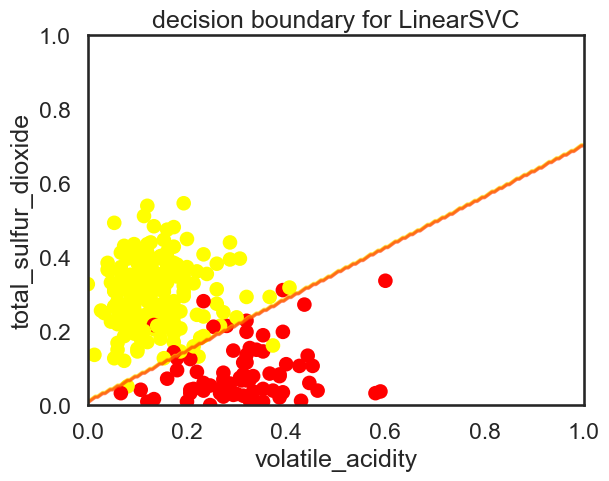

In [16]:
from sklearn.svm import LinearSVC
LSVC=LinearSVC()
LSVC.fit(X,y)

x_color=X.sample(300,random_state=45)
y_color=y.loc[X_color.index]
y_color=y_color.map(lambda r: 'red' if r==1 else 'yellow')
ax=plt.axes()
ax.scatter(
    x_color.iloc[:,0],x_color.iloc[:,1],
    color=y_color,alpha=1)


x_axis,y_axis=np.arange(0,1.005,.005),np.arange(0,1.005, .005)
xx,yy=np.meshgrid(x_axis,y_axis)
xx_ravel=xx.ravel()
yy_ravel=yy.ravel()
x_grid=pd.DataFrame([xx_ravel,yy_ravel]).T
y_grid_predictions=LSVC.predict(x_grid)
y_grid_predictions=y_grid_predictions.reshape(xx.shape)
ax.contour(xx,yy,y_grid_predictions,cmap=plt.cm.autumn_r , alpha=.3)

ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0,1],
    ylim=[0,1],
    title='decision boundary for LinearSVC');

In [17]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

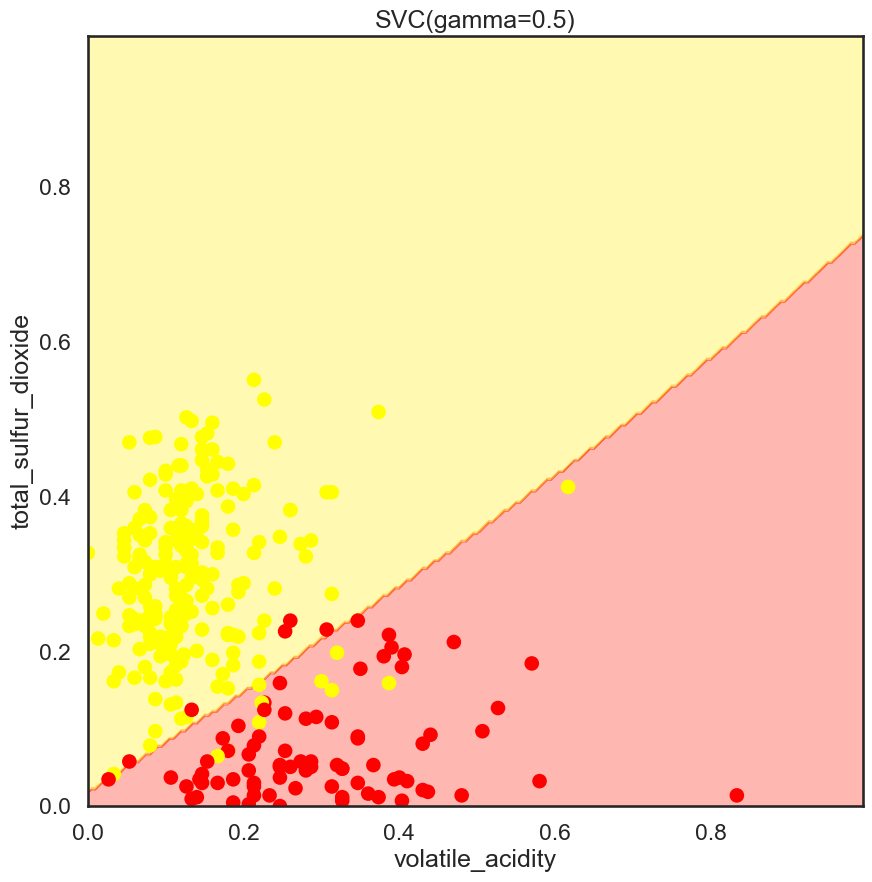

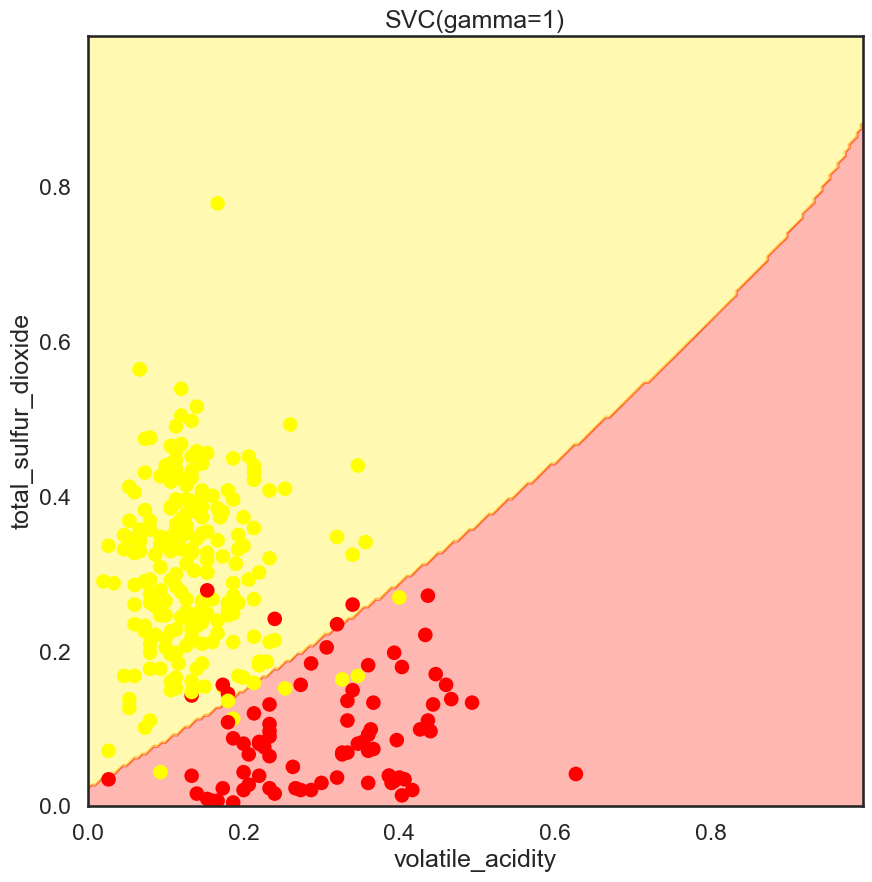

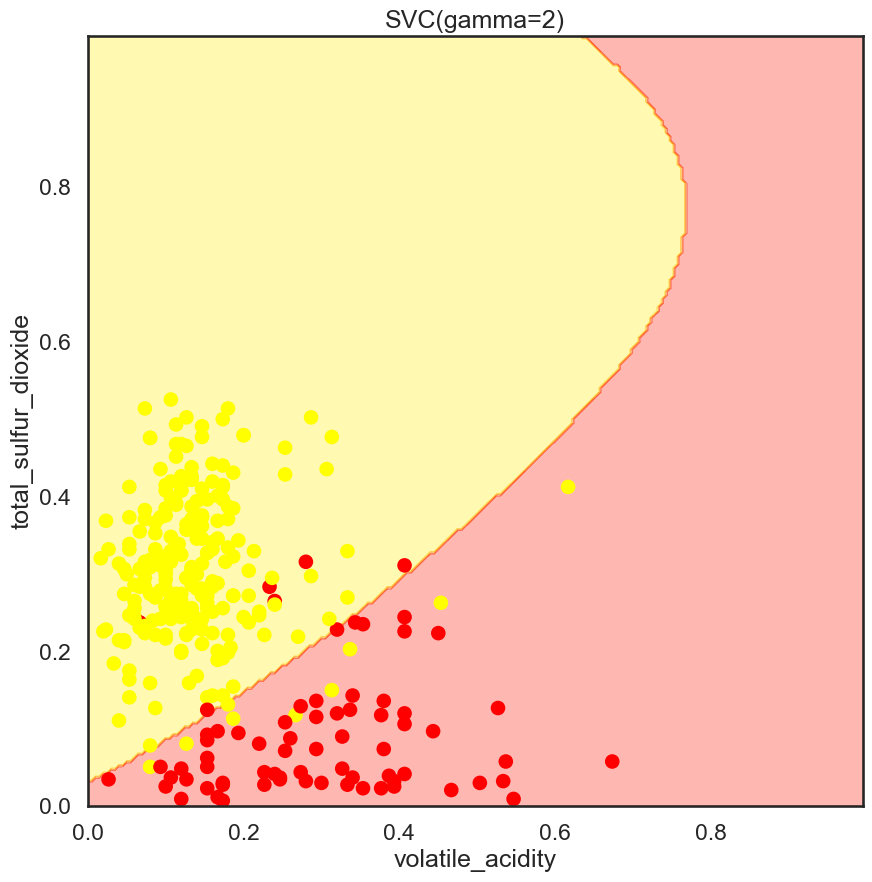

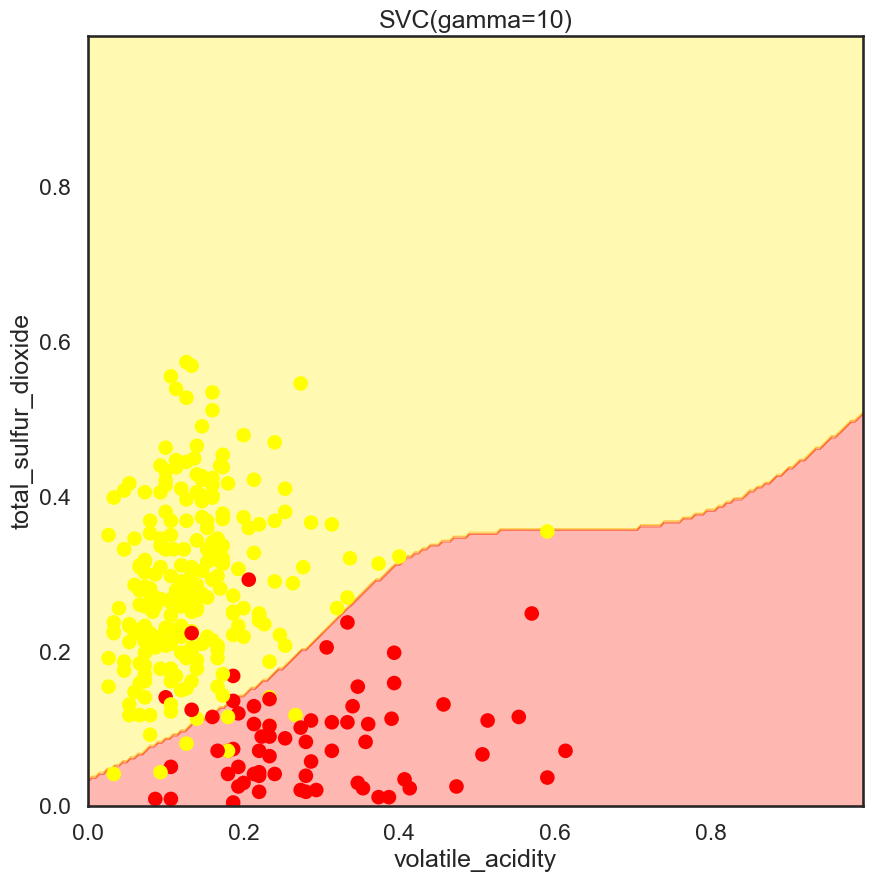

In [18]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

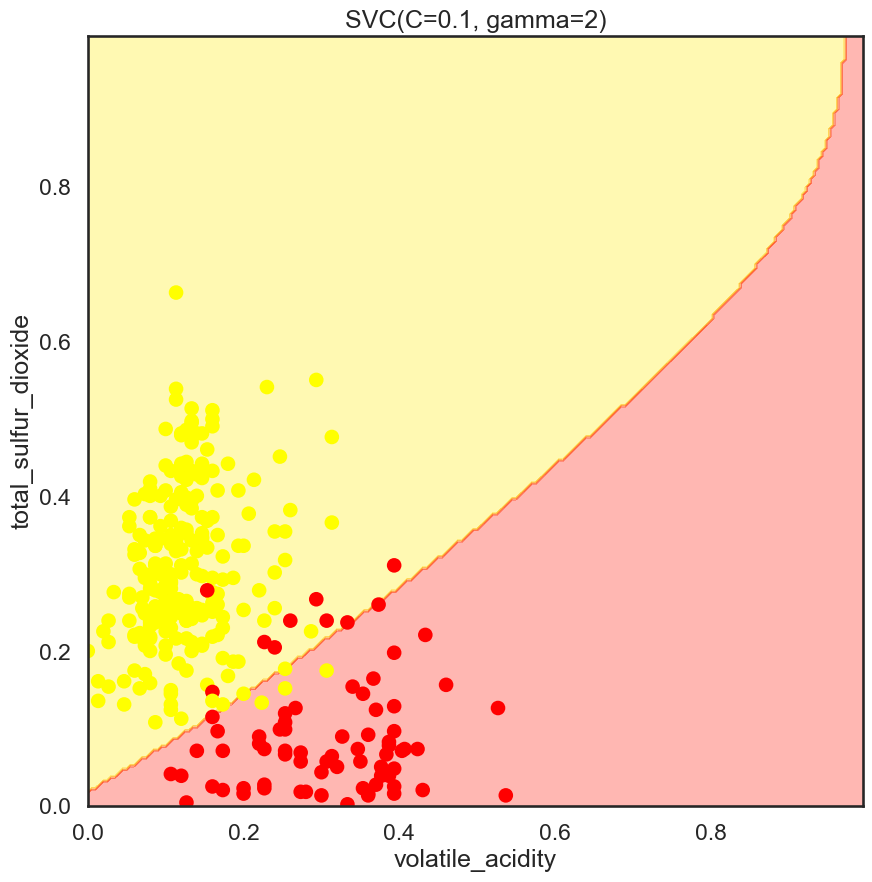

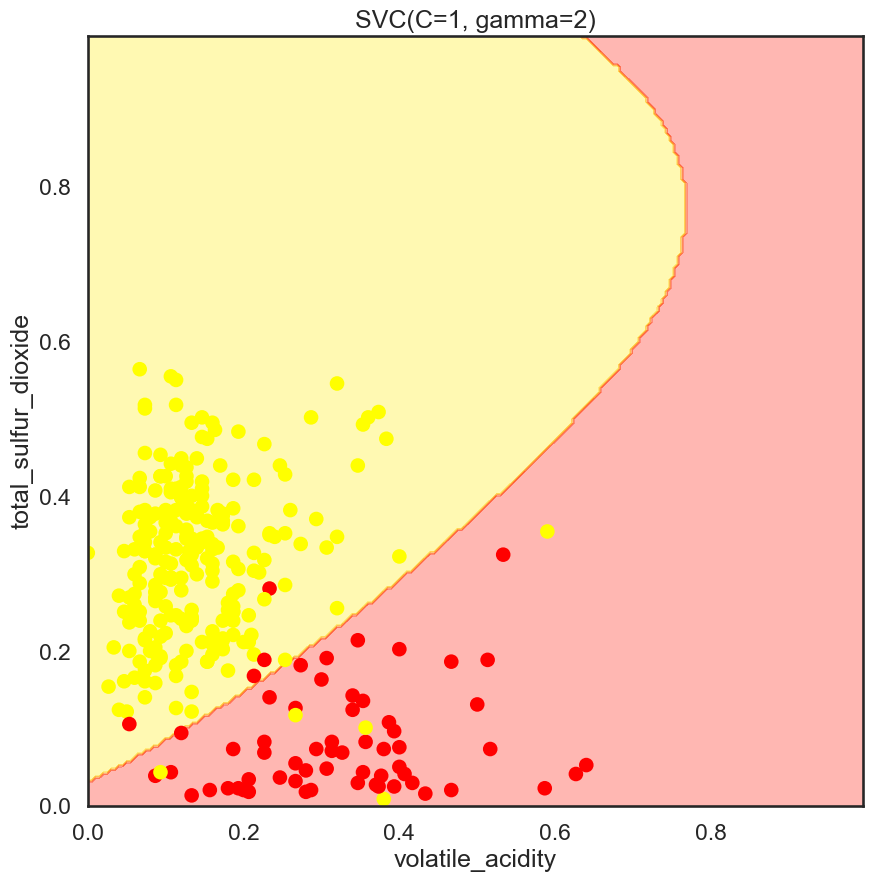

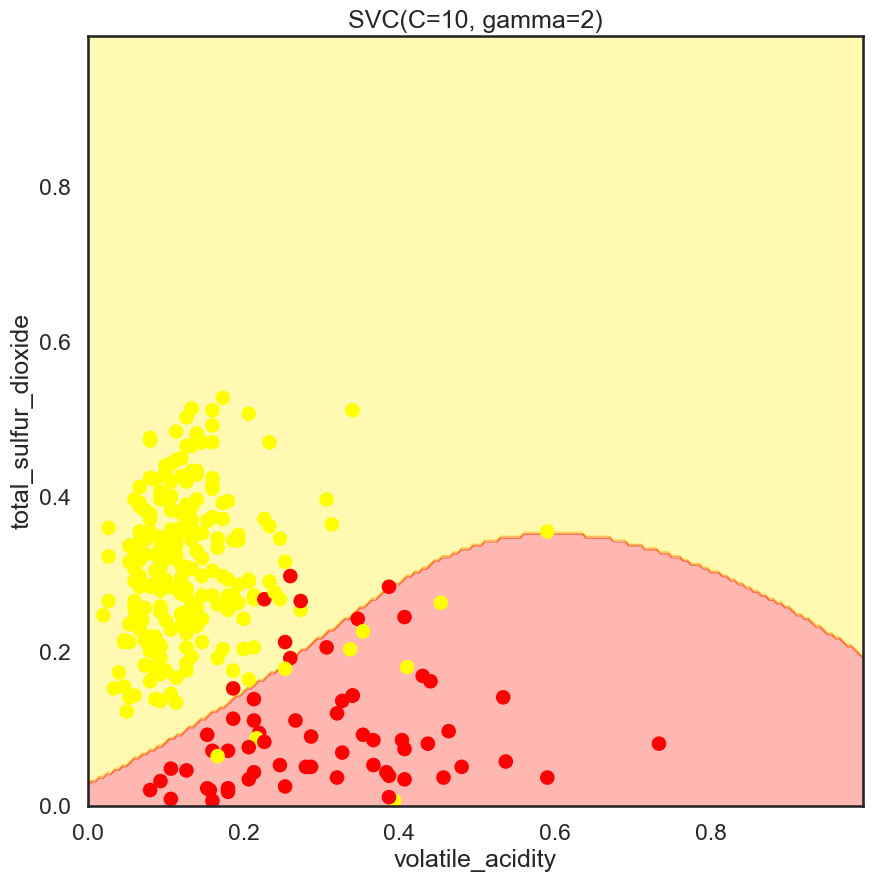

In [19]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [23]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier

y=data.color=='red'
X=data[data.columns[:-1]]

kwargs={'kernel':'rbf'}
svc=SVC(**kwargs)
nystroem=Nystroem(**kwargs)
sgd=SGDClassifier()

In [24]:
%%timeit
svc.fit(X,y)

718 ms ± 76.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

162 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
X2=pd.concat([X]*5)
y2=pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [27]:
%timeit svc.fit(X2, y2)

16.3 s ± 765 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

488 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
